In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("lego_sets.csv")
theme= pd.read_csv("parent_themes.csv")

theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [3]:
df.head().sort_values(by="theme_name")

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [4]:
mergedData= df.merge(theme, left_on='parent_theme', right_on='name')
mergedData.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,Legoland,False


In [5]:
mergedData= mergedData.drop(columns='name_y')


In [6]:
mergedData.shape

(11986, 8)

In [7]:
mergedData.head(20)
mergedData= mergedData.dropna(subset=['set_num'])
mergedData.shape

(11833, 8)

# Q1 What percentage of all licensed sets ever released were Star Wars Themed?

In [8]:

licensed= mergedData[mergedData['is_licensed']==True]
licensed

#Random contitional checks
#licensed.loc[(licensed['id']==158) &(licensed['year']==2001)]



,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True
11984,8518-1,Jet Ray,2010,NaN,Ben 10,Ben 10,270,True


### counting startwars 

In [9]:

groupedLicensedParent= licensed.groupby('parent_theme')
starwarsCount= groupedLicensedParent.get_group('Star Wars').count()[0]
starwarsCount
groupedLicensedParent.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
11980,8409-1,Spidermonkey,2010,NaN,Ben 10,Ben 10,270,True
11981,8410-1,Swampfire,2010,22.0,Ben 10,Ben 10,270,True
11982,8411-1,ChromaStone,2010,21.0,Ben 10,Ben 10,270,True
11983,8517-1,Humungousaur,2010,14.0,Ben 10,Ben 10,270,True


### counting total licensed number

In [10]:
totalCountOfLicensed= licensed['is_licensed'].count()
totalCountOfLicensed

1179

In [11]:
percentageOfStarwarsTheme= int(starwarsCount/ totalCountOfLicensed *100)
print('Percentage of startwars theme: {}%'.format(percentageOfStarwarsTheme))

Percentage of startwars theme: 51%


# Q2: In which year Starwars was not the most popular licensed theme (in terms of number of sets released that year)?

In [12]:
licensedSorted= licensed.sort_values(by='year')
licensedSorted['count']= 1   #we create count col and give 1 thus when grouping it will sum/count all the occurance sets 

#### Year of the lowest production of star wars theme 

In [13]:

summedGroupYearTheme= licensedSorted.groupby(['year','parent_theme']).count().reset_index()
year= summedGroupYearTheme[summedGroupYearTheme['parent_theme']=='Star Wars'].min()

print("In {} star wars produced lowest which is {} sets".format(year[0], year[2]))
summedGroupYearTheme.head(20)

In 1999 star wars produced lowest which is 11 sets


,year,parent_theme,set_num,name_x,num_parts,theme_name,id,is_licensed,count
0,1999,Star Wars,13,13,7,13,13,13,13
1,2000,Disney's Mickey Mouse,5,5,4,5,5,5,5
2,2000,Star Wars,26,26,16,26,26,26,26
3,2001,Harry Potter,11,11,6,11,11,11,11
4,2001,Star Wars,14,14,9,14,14,14,14
5,2002,Harry Potter,19,19,9,19,19,19,19
6,2002,Star Wars,28,28,16,28,28,28,28
7,2002,Super Heroes,3,3,3,3,3,3,3
8,2003,Harry Potter,3,3,0,3,3,3,3
9,2003,Star Wars,32,32,16,32,32,32,32


In [14]:
year

year                 1999
parent_theme    Star Wars
set_num                11
name_x                 11
num_parts               5
theme_name             11
id                     11
is_licensed            11
count                  11
dtype: object

#### Sorting the themes by count and year and keeping only the max theme name and removing other. This is how the max set in given year is found 

In [15]:
dfMax=summedGroupYearTheme.sort_values(by=['year','count'], ascending= False).drop_duplicates(['year'])
dfMax.sort_values(by='year', ascending= True, inplace= True)
dfMax

,year,parent_theme,set_num,name_x,num_parts,theme_name,id,is_licensed,count
0,1999,Star Wars,13,13,7,13,13,13,13
2,2000,Star Wars,26,26,16,26,26,26,26
4,2001,Star Wars,14,14,9,14,14,14,14
6,2002,Star Wars,28,28,16,28,28,28,28
9,2003,Star Wars,32,32,16,32,32,32,32
12,2004,Star Wars,20,20,11,20,20,20,20
16,2005,Star Wars,28,28,18,28,28,28,28
20,2006,Star Wars,11,11,5,11,11,11,11
24,2007,Star Wars,16,16,12,16,16,16,16
28,2008,Star Wars,23,23,15,23,23,23,23


#### Plotting graph 

In [52]:
def getCount(name):
    df=summedGroupYearTheme[summedGroupYearTheme['parent_theme']==name]
    count= df['count']
    return count
def getYear(name):
    df=summedGroupYearTheme[summedGroupYearTheme['parent_theme']==name]
    year= df['year']
    return year

In [69]:
starWarsCount= getCount('Star Wars')
starWarsYears=getYear('Star Wars')
starWarsYears

0     1999
2     2000
4     2001
6     2002
9     2003
12    2004
16    2005
20    2006
24    2007
28    2008
32    2009
36    2010
42    2011
47    2012
52    2013
59    2014
67    2015
76    2016
81    2017
Name: year, dtype: int64

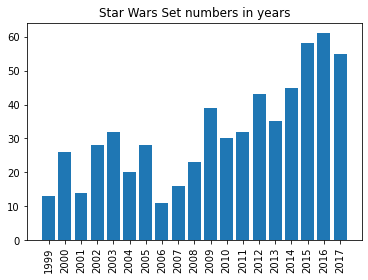

In [54]:
plt.bar(starWarsYears,starWarsCount)
plt.xticks(starWarsYears, rotation='vertical' )
plt.title("Star Wars Set numbers in years")
plt.show()

In [58]:
superHeroesYears= getYear('Super Heroes')
#superHeroesYears

superHeroesCount= getCount('Super Heroes')
superHeroesCount

7      3
10     5
13     6
17     1
21     8
25     2
29     5
43     5
48    32
53    19
60    23
68    28
77    33
82    72
Name: count, dtype: int64

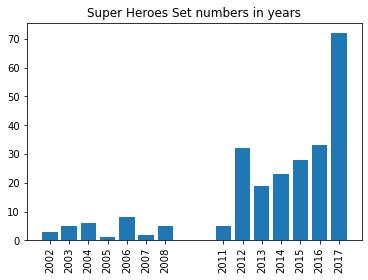

In [59]:
plt.bar(superHeroesYears, superHeroesCount)
plt.xticks(superHeroesYears, rotation='vertical' )
plt.title("Super Heroes Set numbers in years")
plt.show()

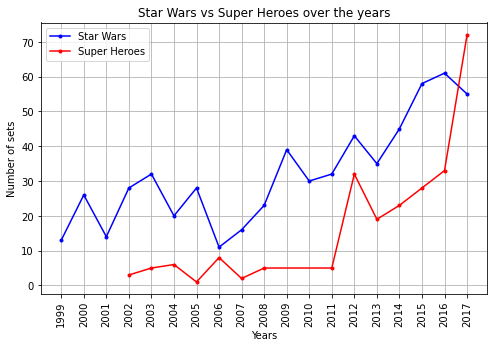

In [65]:
plt.figure(figsize=(8,5))
plt.title("Star Wars vs Super Heroes over the years")
plt.plot( starWarsYears,starWarsCount, 'b.-',label='Star Wars')
plt.plot(superHeroesYears, superHeroesCount, 'r.-', label='Super Heroes')

plt.xlabel("Years")
plt.ylabel("Number of sets")
plt.xticks(starWarsYears, rotation= 'vertical')
plt.legend()
plt.grid()
plt.show()

### Ploting All themes  vs year

In [51]:
allThemeNames=summedGroupYearTheme['parent_theme'].unique()
sortedThemeNames= allThemeNames[:10]
sortedThemeNames

array(['Star Wars', "Disney's Mickey Mouse", 'Harry Potter',
       'Super Heroes', 'Avatar', 'SpongeBob SquarePants', 'Indiana Jones',
       'Ben 10', 'Prince of Persia', 'Toy Story'], dtype=object)

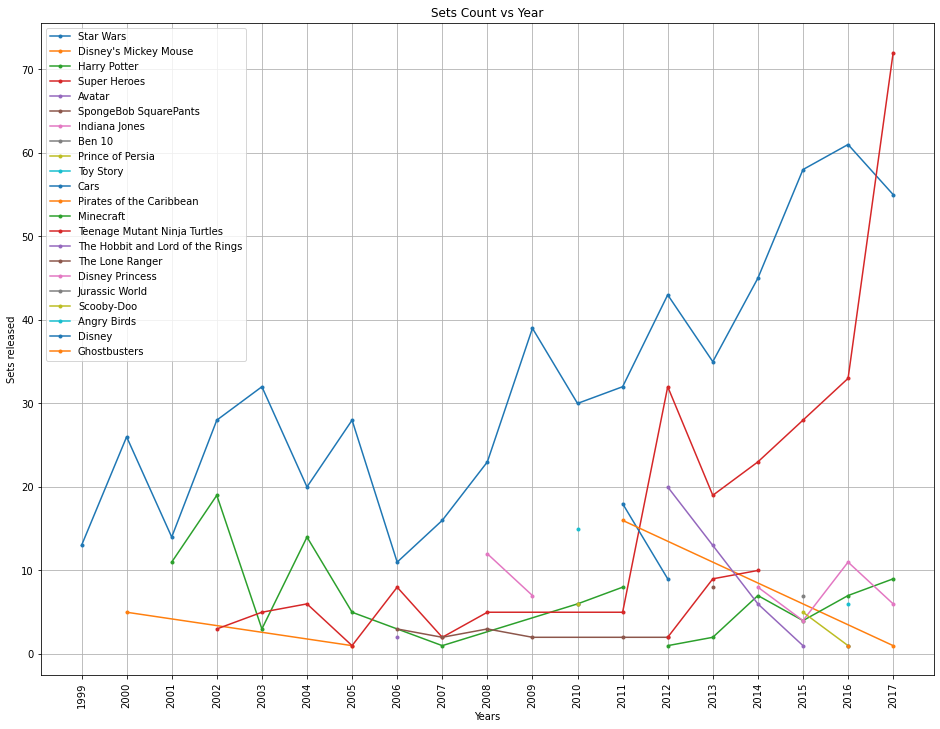

In [76]:
plt.figure(figsize=(16,12))
plt.title('All Sets Count vs Year')
plt.xlabel('Years')
plt.ylabel('Sets released')
plt
for theme in allThemeNames:
    plt.plot( getYear(theme),getCount(theme),marker='.',label=theme)
plt.legend()
plt.grid()
plt.xticks(starWarsYears, rotation= 'vertical')
plt.show()

### Removing themes that only released 1 set

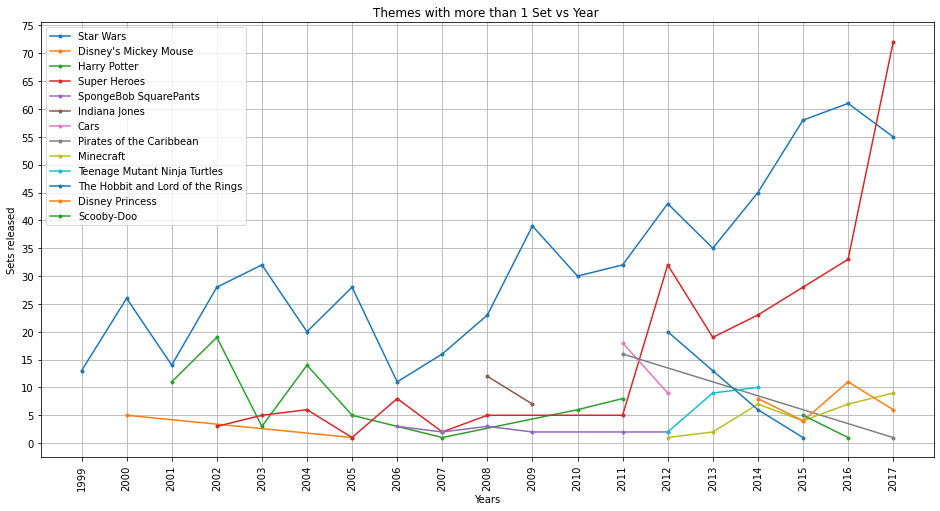

In [84]:

plt.figure(figsize=(16,8))
plt.title('Themes with more than 1 Set vs Year ')
plt.xlabel('Years')
plt.ylabel('Sets released')

for theme in allThemeNames:
    if (getYear(theme).count()>1):
        plt.plot( getYear(theme),getCount(theme),marker='.',label=theme)
plt.legend()
plt.grid()
plt.xticks(starWarsYears, rotation= 'vertical')
plt.yticks(range(0, 80, 5))
plt.show()